# Health Status Clustering

The original contributors to this hackathon were Anj Collanto, Glenn Dalida, Jose Medriano and Kemp Po. However, I redid most of the code since clustering became highly dependent on the region that was attributed to the country.

This notebook was compiled and organized by Anj Collanto.

The main objective of this hackathon is to determine countries that can be clustered together based on World Bank Data Health Indicators. After clustering, we are to identify what types of health programs are appropriate for each cluster.

# I. Data Preparation

The World Bank Data contained exactly 252 health indicators. The problem was that not all countries collected the same data. So for each health indicator, there were a number of countries that had missing values.

With the limited time, the team opted use data from 2015 since this had the most data for all countries. From here, we selected health indicators that were available for 150+ countries that covered different aspects of health.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# expanding display
from IPython.display import display
pd.options.display.max_columns = None

In [3]:
df = pd.read_csv('API_8_DS2_en_csv_v2_10576655.csv',skiprows=4)
df_metadata = pd.read_csv('Metadata_Indicator_API_8_DS2_en_csv_v2_10576655.csv')
df_countries = pd.read_csv('Metadata_Country_API_8_DS2_en_csv_v2_10576655.csv')

In [4]:
not_country = ['ARB','CEB','CSS','EAP','EAR','EAS','ECA','ECS','EMU','EUU','FCS','HIC','HPC','IBD','IBT','IDA',
               'IDB','IDX','LAC','LCN','LDC','LIC','LMC','LMY','LTE','MEA','MIC','MNA','NAC','OED','OSS','PRE',
               'PSS','PST','SAS','SSA','SSF','SST','TEA','TEC','TLA','TMN','TSA','TSS','UMC','WLD']

In [5]:
df = df.loc[~df['Country Code'].isin(not_country)]

## SANITATION WATER

In [6]:
wat1_list=list(df_metadata['INDICATOR_CODE'].loc[df_metadata['SOURCE_ORGANIZATION']== 'WHO/UNICEF Joint Monitoring Programme (JMP) for Water Supply and Sanitation (http://www.wssinfo.org/).'])
wat2_list=list(df_metadata['INDICATOR_CODE'].loc[df_metadata['SOURCE_ORGANIZATION']== 'WHO/UNICEF Joint Monitoring Programme (JMP) for Water Supply, Sanitation and Hygiene (washdata.org).'])
water = wat1_list+wat2_list

In [7]:
df_water = df.loc[df['Indicator Code'].isin(water)]

In [8]:
#Pivot table for Year x
df_water = pd.pivot_table(df_water, values='2015', index=['Country Name'],
                          columns=['Indicator Name'], fill_value=np.nan).reset_index()

In [9]:
df_water = df_water.drop(columns = ['People using safely managed drinking water services (% of population)',
       'People using safely managed drinking water services, rural (% of rural population)',
       'People using safely managed drinking water services, urban (% of urban population)',
       'People using safely managed sanitation services (% of population)',
       'People using safely managed sanitation services, rural (% of rural population)',
       'People using safely managed sanitation services, urban (% of urban population)',
       'People with basic handwashing facilities including soap and water (% of population)',
       'People with basic handwashing facilities including soap and water, rural (% of rural population)',
       'People with basic handwashing facilities including soap and water, urban (% of urban population)'])

In [10]:
df_water.set_index('Country Name', inplace=True)

In [11]:
df_water = df_water.dropna()

In [12]:
df_water.columns

Index(['People practicing open defecation (% of population)',
       'People practicing open defecation, rural (% of rural population)',
       'People practicing open defecation, urban (% of urban population)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic drinking water services, rural (% of rural population)',
       'People using at least basic drinking water services, urban (% of urban population)',
       'People using at least basic sanitation services (% of population)',
       'People using at least basic sanitation services, rural (% of rural population)',
       'People using at least basic sanitation services, urban (% of urban population)'],
      dtype='object', name='Indicator Name')

In [13]:
df_water = df_water[['People practicing open defecation (% of population)',
                     'People using at least basic drinking water services (% of population)',
                     'People using at least basic sanitation services (% of population)']]

In [14]:
df_water.head()

Indicator Name,People practicing open defecation (% of population),People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population)
Country Name,,,
Afghanistan,13.546370,62.980208,39.220433
Albania,0.199816,91.394333,97.690655
Algeria,0.800648,93.466427,87.487686
Andorra,0.000000,100.000000,100.000000
Angola,32.842734,41.005868,39.429423


## HEALTH EXPENDITURE*

In [15]:
exp_list = list(df_metadata['INDICATOR_CODE'].loc[df_metadata['SOURCE_ORGANIZATION']== 'World Health Organization Global Health Expenditure database (http://apps.who.int/nha/database).'])

In [16]:
df_expenditure = df.loc[df['Indicator Code'].isin(exp_list)]

In [17]:
df_expenditure = df_expenditure.dropna(thresh=20,axis=0)

In [18]:
#Pivot table for Year x
df_expenditure = pd.pivot_table(df_expenditure, values='2015', index=['Country Name'], columns=['Indicator Name'], fill_value=np.nan)

In [19]:
df_expenditure.head()

Indicator Name,Current health expenditure (% of GDP),Current health expenditure per capita (current US$),"Current health expenditure per capita, PPP (current international $)",Domestic general government health expenditure (% of GDP),Domestic general government health expenditure (% of current health expenditure),Domestic general government health expenditure (% of general government expenditure),Domestic general government health expenditure per capita (current US$),"Domestic general government health expenditure per capita, PPP (current international $)",Domestic private health expenditure (% of current health expenditure),Domestic private health expenditure per capita (current US$),"Domestic private health expenditure per capita, PPP (current international $)",External health expenditure (% of current health expenditure),External health expenditure per capita (current US$),"External health expenditure per capita, PPP (current international $)",Out-of-pocket expenditure (% of current health expenditure),Out-of-pocket expenditure per capita (current US$),"Out-of-pocket expenditure per capita, PPP (current international $)"
Country Name,,,,,,,,,,,,,,,,,
Albania,6.819740,264.434603,758.231531,2.901441,42.544585,9.508133,112.503026,322.587666,56.686038,149.898061,429.813023,NaN,NaN,NaN,56.686250,149.898061,429.813023
Algeria,6.982892,290.503240,1020.546414,4.920105,70.459426,10.733090,204.686916,719.071146,29.514423,85.740355,301.208385,0.026151,0.075970,0.266886,28.208433,81.946411,287.880147
Andorra,10.261174,3698.117574,5097.379868,4.954715,48.286042,15.243685,1785.674589,2461.322962,51.713958,1912.442985,2636.056907,NaN,NaN,NaN,42.388491,1567.576218,2160.702382
Angola,2.950431,108.680669,195.757347,1.397478,47.365231,4.562626,51.476850,92.720920,49.964446,54.301695,97.809074,2.670322,2.902124,5.227352,33.523166,36.433201,65.624060
Antigua and Barbuda,4.715981,644.140057,1012.121609,3.218593,68.248634,12.303438,439.616793,690.759177,31.604845,203.579467,319.879466,0.146520,0.943797,1.482965,25.799874,166.187320,261.126095


In [20]:
df_expenditure.isna().sum()

Indicator Name
Current health expenditure (% of GDP)                                                        0
Current health expenditure per capita (current US$)                                          0
Current health expenditure per capita, PPP (current international $)                         0
Domestic general government health expenditure (% of GDP)                                    0
Domestic general government health expenditure (% of current health expenditure)             0
Domestic general government health expenditure (% of general government expenditure)         0
Domestic general government health expenditure per capita (current US$)                      0
Domestic general government health expenditure per capita, PPP (current international $)     0
Domestic private health expenditure (% of current health expenditure)                        0
Domestic private health expenditure per capita (current US$)                                 0
Domestic private health expenditure

In [21]:
df_expenditure = df_expenditure[['Current health expenditure per capita (current US$)']]

In [22]:
df_expenditure.dropna(inplace=True)

### EDA on Health expenditure

Text(0.5, 1.0, 'Current health expenditure per capita (current US$)')

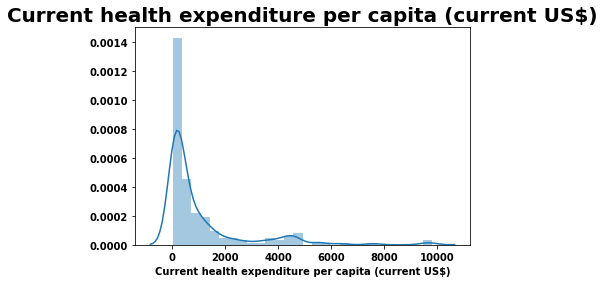

In [23]:
sns.distplot(df_expenditure['Current health expenditure per capita (current US$)'])
plt.title('Current health expenditure per capita (current US$)', fontsize=20)

In [24]:
df_expenditure.sort_values(by='Current health expenditure per capita (current US$)')

Indicator Name,Current health expenditure per capita (current US$)
Country Name,
Burundi,14.386747
"Congo, Dem. Rep.",20.111545
"Gambia, The",21.853833
Central African Republic,21.979353
Madagascar,22.131685
Ethiopia,25.111550
Niger,25.722820
Eritrea,27.180653
Mozambique,27.378497


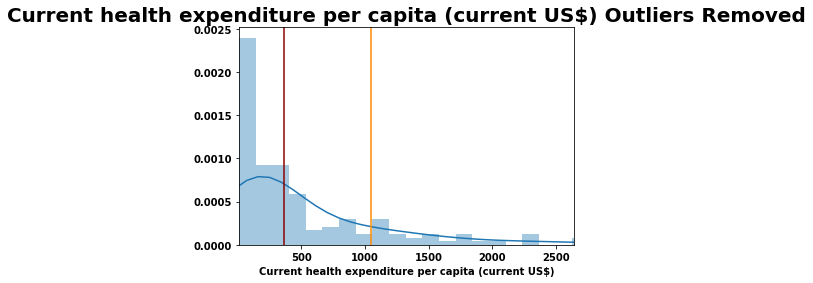

In [25]:
percentiles = np.percentile(df_expenditure['Current health expenditure per capita (current US$)'], q=[25, 50, 75])
iqr = percentiles[-1] - percentiles[0]
upper_whisker =  min(df_expenditure['Current health expenditure per capita (current US$)'].max(), percentiles[-1] + iqr * 1.5)
lower_whisker = max(df_expenditure['Current health expenditure per capita (current US$)'].min(), percentiles[0] - iqr * 1.5)

sns.distplot(df_expenditure['Current health expenditure per capita (current US$)'], bins=75)
plt.xlim(lower_whisker, upper_whisker)
plt.title('Current health expenditure per capita (current US$) Outliers Removed', fontsize=20)
plt.axvline(df_expenditure['Current health expenditure per capita (current US$)'].mean(), color='darkorange')
plt.axvline(df_expenditure['Current health expenditure per capita (current US$)'].median(), color='darkred')

## Final Dataframe

Here, df_final is the dataframe we will use for our analysis. This contains the following health indicators for 141 countries:
- People practicing open defecation (% of population)
- People using at least basic drinking water services (% of population)
- People using at least basic sanitation services (% of population)
- Current health expenditure per capita (current US$)
- Death rate, crude (per 1,000 people)
- Incidence of tuberculosis (per 100,000 people)
- Life expectancy at birth, total (years)
- Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)
- Mortality rate, infant (per 1,000 live births)
- Prevalence of anemia among children (% of children under 5)
- Prevalence of undernourishment (% of population)
- Survival to age 65, female (% of cohort)
- Survival to age 65, male (% of cohort)
- IncomeGroup

In [26]:
df_final = df_water.merge(df_expenditure, left_index=True, right_index=True)

In [27]:
df_final.head()

Indicator Name,People practicing open defecation (% of population),People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),Current health expenditure per capita (current US$)
Country Name,,,,
Albania,0.199816,91.394333,97.690655,264.434603
Algeria,0.800648,93.466427,87.487686,290.503240
Andorra,0.000000,100.000000,100.000000,3698.117574
Angola,32.842734,41.005868,39.429423,108.680669
Argentina,1.351194,99.627300,94.839881,1298.683163


In [28]:
more_indicators = ['SP.DYN.LE00.IN','SP.DYN.IMRT.IN','SP.DYN.CDRT.IN','SH.DYN.NCOM.ZS',
                   'SN.ITK.DEFC.ZS','SH.HIV.ARTC.ZS','SH.STA.WASH.P5','SH.STA.AIRP.P5',
                  'SH.TBS.INCD','SP.DYN.TO65.MA.ZS','SP.DYN.TO65.FE.ZS','SH.STA.STNT.ZS',
                  'SH.MED.PHYS.ZS','SH.ANM.CHLD.ZS']

df2 = df.loc[df['Indicator Code'].isin(more_indicators)]

df2= pd.pivot_table(df2, values='2015', index=['Country Name'], columns=['Indicator Name'], fill_value=np.nan)

df2.isnull().sum()

df2 = df2.dropna(thresh = 150,axis=1)

df2 = df2.dropna()

df_final = df_final.merge(df2,left_index=True, right_index=True)

del df2

In [29]:
df_final.reset_index(inplace=True)
df_final.head()

Indicator Name,Country Name,People practicing open defecation (% of population),People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),Current health expenditure per capita (current US$),"Death rate, crude (per 1,000 people)","Incidence of tuberculosis (per 100,000 people)","Life expectancy at birth, total (years)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality rate, infant (per 1,000 live births)",Prevalence of anemia among children (% of children under 5),Prevalence of undernourishment (% of population),"Survival to age 65, female (% of cohort)","Survival to age 65, male (% of cohort)"
0,Albania,0.199816,91.394333,97.690655,264.434603,7.217,16.0,78.174,17.4,8.3,24.0,5.5,90.62333,85.38936
1,Algeria,0.800648,93.466427,87.487686,290.503240,4.773,74.0,75.860,14.4,21.4,29.7,4.6,85.06557,81.04720
2,Angola,32.842734,41.005868,39.429423,108.680669,8.683,366.0,61.241,16.9,58.2,51.3,24.8,65.38931,55.42365
3,Argentina,1.351194,99.627300,94.839881,1298.683163,7.570,25.0,76.415,16.1,10.2,21.4,3.6,87.49357,76.19645
4,Armenia,0.000000,98.923652,91.582767,366.049248,9.694,50.0,74.445,23.0,12.5,30.7,4.3,86.35999,71.88195


In [30]:
df_final = df_final.merge(df_countries,left_on='Country Name', right_on='TableName')
df_final.drop(columns = ['SpecialNotes','TableName','Unnamed: 5','Region','Country Code'], inplace=True)

In [31]:
df_final.head()

,Country Name,People practicing open defecation (% of population),People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),Current health expenditure per capita (current US$),"Death rate, crude (per 1,000 people)","Incidence of tuberculosis (per 100,000 people)","Life expectancy at birth, total (years)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality rate, infant (per 1,000 live births)",Prevalence of anemia among children (% of children under 5),Prevalence of undernourishment (% of population),"Survival to age 65, female (% of cohort)","Survival to age 65, male (% of cohort)",IncomeGroup
0,Albania,0.199816,91.394333,97.690655,264.434603,7.217,16.0,78.174,17.4,8.3,24.0,5.5,90.62333,85.38936,Upper middle income
1,Algeria,0.800648,93.466427,87.487686,290.503240,4.773,74.0,75.860,14.4,21.4,29.7,4.6,85.06557,81.04720,Upper middle income
2,Angola,32.842734,41.005868,39.429423,108.680669,8.683,366.0,61.241,16.9,58.2,51.3,24.8,65.38931,55.42365,Lower middle income
3,Argentina,1.351194,99.627300,94.839881,1298.683163,7.570,25.0,76.415,16.1,10.2,21.4,3.6,87.49357,76.19645,High income
4,Armenia,0.000000,98.923652,91.582767,366.049248,9.694,50.0,74.445,23.0,12.5,30.7,4.3,86.35999,71.88195,Upper middle income


In [32]:
df_final['IncomeGroup'].replace('Low income',0,inplace=True)
df_final['IncomeGroup'].replace('Lower middle income',1,inplace=True)
df_final['IncomeGroup'].replace('Upper middle income',2,inplace=True)
df_final['IncomeGroup'].replace('High income',3,inplace=True)


## Correlation of health indicators

In this heatmap, we see that several indicators are highly correlated with each other. However, we did not drop any of the fields because some indicators are more specific aspects of the general health. For example, the first three indicators have a high correlation with each other as it all relates to water and sanitation; however, when we do PCA later on, we may see that each indicator has a different contribution to clustering

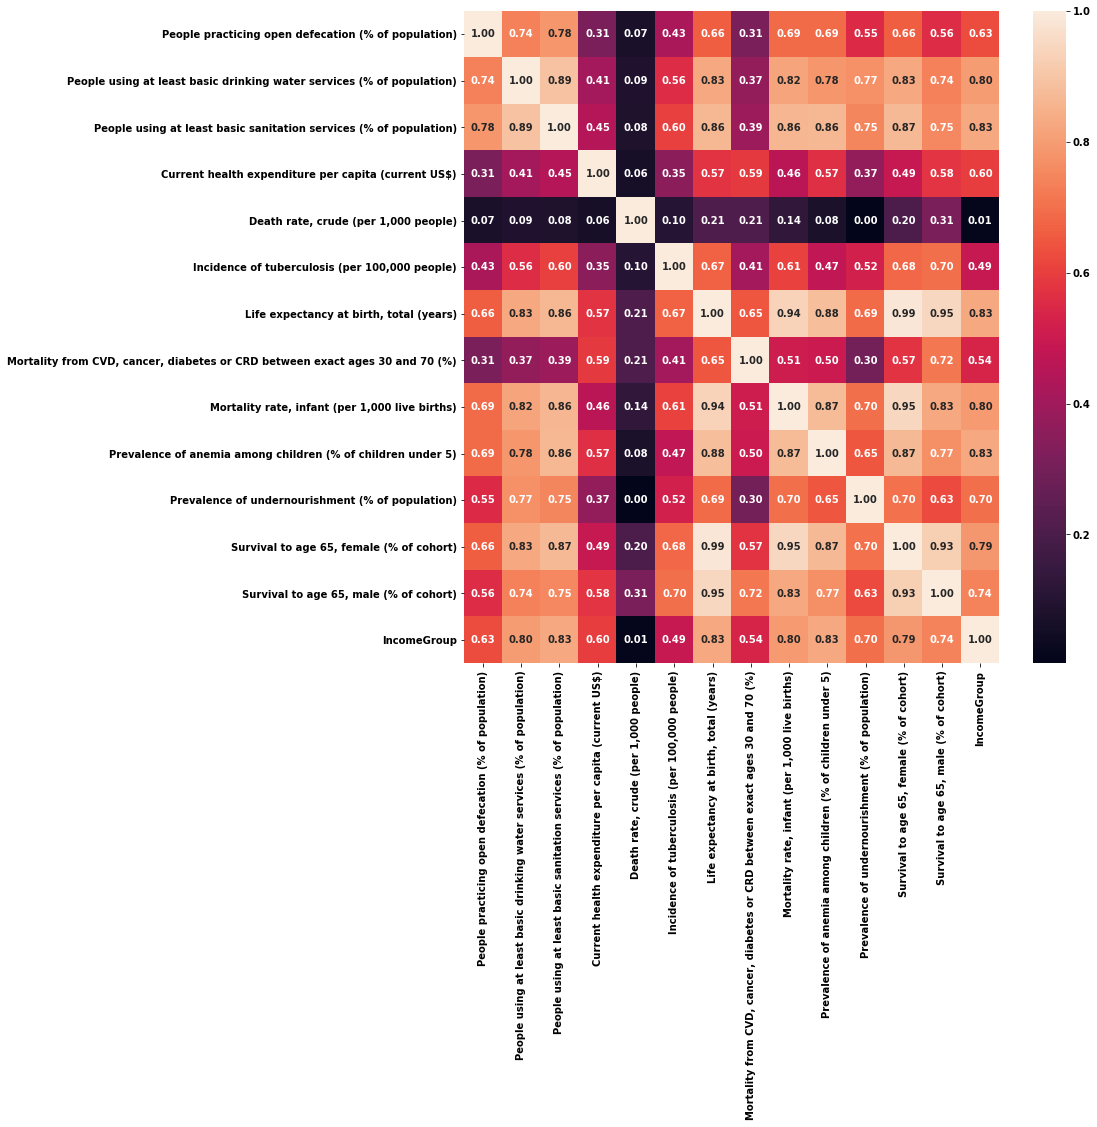

In [33]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_final.loc[:,'People practicing open defecation (% of population)':'IncomeGroup'].corr().abs(),
            annot=True,fmt='.2f', ax=ax)

In [34]:
df_final.set_index('Country Name',inplace = True)

# II. Clustering the Countries using K-Means

## Data Scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

mms.fit(df_final)

df_final_scaled = mms.transform(df_final)

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Determine number of clusters

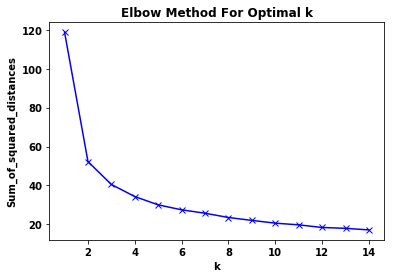

In [36]:
from sklearn.cluster import KMeans
from sklearn import metrics

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_final_scaled)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## K-means clustering (4 clusters)

In [37]:
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(df_final_scaled)

#df_final.reset_index(inplace=True)

In [38]:
labels = kmeans.fit_predict(df_final_scaled)

df_final['Cluster'] = labels

In [39]:
df_final = df_final.reset_index()

# III. Visualizing with PCA

In [44]:
df_final.set_index('Country Name',inplace=True)

In [45]:
from sklearn.decomposition import PCA

In [46]:
pca = PCA(n_components=3) 
pca.fit(df_final_scaled) 
X_PCA = pca.transform(df_final_scaled) 
X_PCA.shape

(141, 3)

In [47]:
df_final.columns

Index(['People practicing open defecation (% of population)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic sanitation services (% of population)',
       'Current health expenditure per capita (current US$)',
       'Death rate, crude (per 1,000 people)',
       'Incidence of tuberculosis (per 100,000 people)',
       'Life expectancy at birth, total (years)',
       'Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)',
       'Mortality rate, infant (per 1,000 live births)',
       'Prevalence of anemia among children (% of children under 5)',
       'Prevalence of undernourishment (% of population)',
       'Survival to age 65, female (% of cohort)',
       'Survival to age 65, male (% of cohort)', 'IncomeGroup', 'Cluster'],
      dtype='object')

## Weight of Components*

From the graph below, we see that:
1. The first component shows that its key determinants relate to life expectancy, and sanitation. It is also important to note that there is a strong negative component for countries in Europe and Central Asia, while there is a strong positive component for countries in Sub-Saharan Africa.
 - This means that countries from Sub-Saharan Africa are most likely grouped with each other
2. The second component has a strong positive component of Income Group. This means the 2nd component essentially classifies a countries cluster based on income group
3. Finally, the third component shows a mortality from CVD and income group as strong positive components. 

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


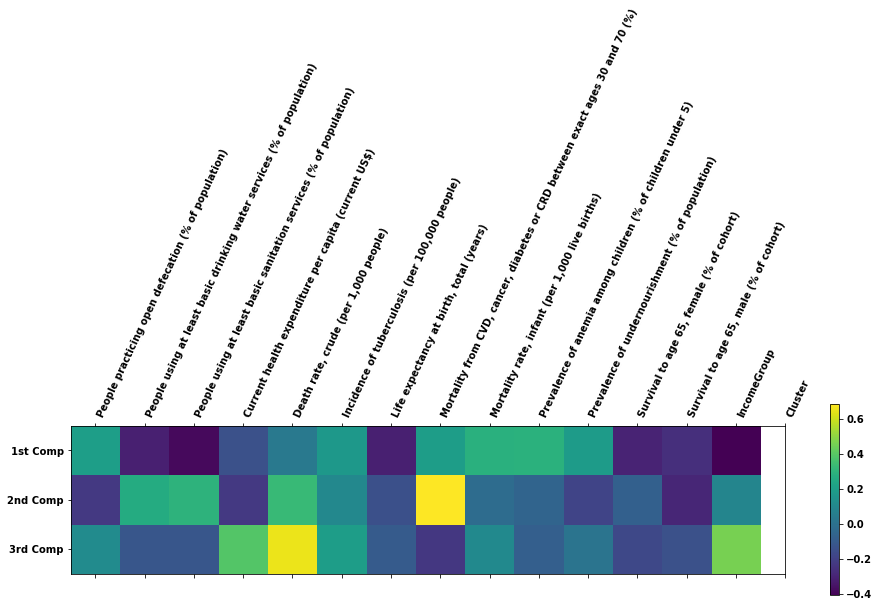

In [48]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1,2], ['1st Comp','2nd Comp','3rd Comp'], fontsize=10)
plt.colorbar()
plt.xticks(range(len(df_final.columns)), df_final.columns, rotation=65, ha='left')
plt.tight_layout()
plt.show()

## Graph of Clusters

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWar

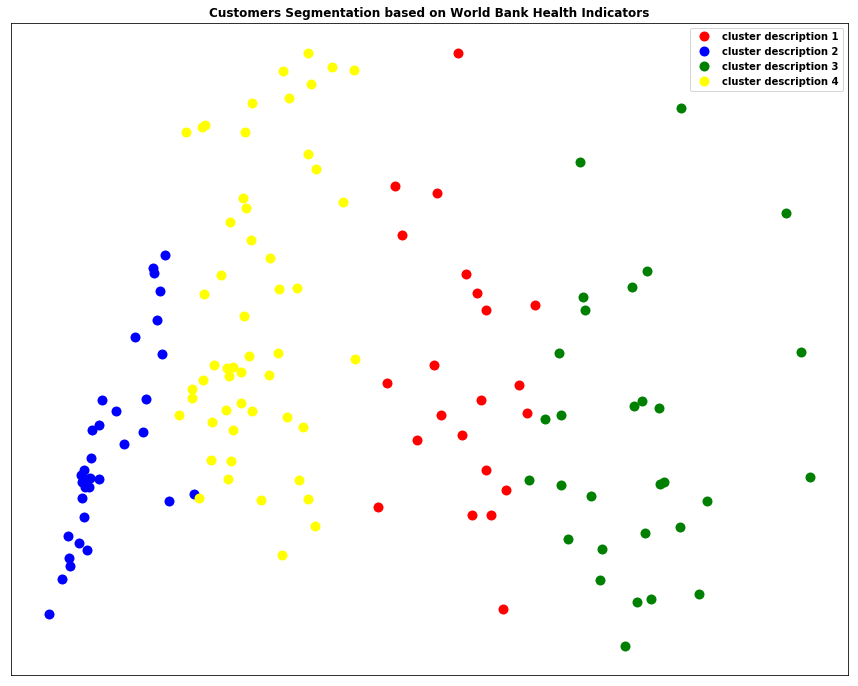

In [49]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow'}

names = {0: 'cluster description 1', 
         1: 'cluster description 2', 
         2: 'cluster description 3', 
         3: 'cluster description 4'}
  
df_pca = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df_pca.groupby('label')

fig, ax = plt.subplots(figsize=(15,12))

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=10,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on World Bank Health Indicators")
plt.show()

## Checking Silhouette Score of model

In [50]:
from sklearn import metrics

In [51]:
metrics.silhouette_score(df_pca, clusters, metric='euclidean')

0.7889217703181144

## Looking at each cluster

In [75]:
df_final[df_final.Cluster == 0].index

Index(['Bangladesh', 'Bolivia', 'Botswana', 'Cabo Verde', 'Cambodia',
       'Djibouti', 'Gabon', 'India', 'Indonesia', 'Kenya', 'Kiribati',
       'Lao PDR', 'Mongolia', 'Myanmar', 'Namibia', 'Nepal', 'Pakistan',
       'Philippines', 'Rwanda', 'Senegal', 'Solomon Islands', 'South Africa'],
      dtype='object', name='Country Name')

In [69]:
df_final[df_final.Cluster == 1].index

Index(['Argentina', 'Austria', 'Belgium', 'Brunei Darussalam', 'Chile',
       'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Luxembourg', 'Malta', 'Netherlands',
       'New Zealand', 'Norway', 'Panama', 'Poland', 'Portugal',
       'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay'],
      dtype='object', name='Country Name')

In [82]:
df_final[df_final.Cluster == 2]

,People practicing open defecation (% of population),People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),Current health expenditure per capita (current US$),"Death rate, crude (per 1,000 people)","Incidence of tuberculosis (per 100,000 people)","Life expectancy at birth, total (years)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality rate, infant (per 1,000 live births)",Prevalence of anemia among children (% of children under 5),Prevalence of undernourishment (% of population),"Survival to age 65, female (% of cohort)","Survival to age 65, male (% of cohort)",IncomeGroup_x,Cluster,Country Code,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Country Name,,,,,,,,,,,,,,,,,,,,,,,
Angola,32.842734,41.005868,39.429423,108.680669,8.683,366.0,61.241,16.9,58.2,51.3,24.8,65.38931,55.42365,1,2,AGO,0,0,0,0,0,0,1
Benin,55.161020,67.017287,13.930112,31.294392,9.319,60.0,60.639,19.7,66.6,63.4,9.9,62.83819,57.01434,0,2,BEN,0,0,0,0,0,0,1
Burkina Faso,47.976285,53.857596,22.532081,33.514852,8.818,52.0,59.927,21.9,54.3,86.5,20.8,60.50189,56.27351,0,2,BFA,0,0,0,0,0,0,1
Cameroon,7.080849,65.279966,38.834985,63.627992,10.348,212.0,57.582,21.8,58.2,62.6,6.5,54.03842,49.75066,1,2,CMR,0,0,0,0,0,0,1
Central African Republic,23.921075,54.143860,25.087000,21.979353,14.008,391.0,51.410,23.7,91.6,72.2,60.3,45.32778,39.96351,0,2,CAF,0,0,0,0,0,0,1
Chad,67.590905,42.537604,9.548388,35.521378,13.217,152.0,52.575,24.1,76.7,73.7,38.4,48.75391,43.79587,0,2,TCD,0,0,0,0,0,0,1
"Congo, Rep.",8.042189,68.340457,15.009329,58.448620,7.556,379.0,64.112,17.0,36.9,64.4,37.7,65.13220,59.60912,1,2,COG,0,0,0,0,0,0,1
Eswatini,10.938326,67.626089,58.025836,231.416231,9.861,404.0,57.107,26.6,42.5,41.8,21.0,53.50150,37.63388,1,2,SWZ,0,0,0,0,0,0,1
Ethiopia,27.163060,39.124262,7.078918,25.111550,6.997,192.0,65.037,18.4,44.2,50.0,22.8,68.87692,61.91884,0,2,ETH,0,0,0,0,0,0,1


In [71]:
df_final[df_final.Cluster == 3].index

Index(['Albania', 'Algeria', 'Armenia', 'Azerbaijan', 'Belarus', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'China', 'Colombia',
       'Cuba', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.',
       'El Salvador', 'Fiji', 'Georgia', 'Guatemala', 'Guyana', 'Honduras',
       'Hungary', 'Iran, Islamic Rep.', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kyrgyz Republic', 'Latvia', 'Lithuania', 'Malaysia', 'Maldives',
       'Mauritius', 'Mexico', 'Morocco', 'Nicaragua', 'North Macedonia',
       'Oman', 'Paraguay', 'Peru', 'Romania', 'Russian Federation', 'Samoa',
       'Serbia', 'Sri Lanka', 'Suriname', 'Thailand', 'Tunisia', 'Turkey',
       'Turkmenistan', 'Ukraine', 'Vanuatu', 'Venezuela, RB', 'Vietnam'],
      dtype='object', name='Country Name')

### Adding Regions

In [52]:
df_final = df_final.reset_index().merge(df_countries,left_on = 'Country Name', right_on = "TableName").drop(columns =['IncomeGroup_y','SpecialNotes','TableName','Unnamed: 5'])
df_final.set_index('Country Name',inplace=True)

In [ ]:
df_final.drop(columns = ['IncomeGroup_y','SpecialNotes','TableName','Unnamed: 5'])

In [58]:
df_final.head()

,People practicing open defecation (% of population),People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),Current health expenditure per capita (current US$),"Death rate, crude (per 1,000 people)","Incidence of tuberculosis (per 100,000 people)","Life expectancy at birth, total (years)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality rate, infant (per 1,000 live births)",Prevalence of anemia among children (% of children under 5),Prevalence of undernourishment (% of population),"Survival to age 65, female (% of cohort)","Survival to age 65, male (% of cohort)",IncomeGroup_x,Cluster,Country Code,Region
Country Name,,,,,,,,,,,,,,,,,
Albania,0.199816,91.394333,97.690655,264.434603,7.217,16.0,78.174,17.4,8.3,24.0,5.5,90.62333,85.38936,2,3,ALB,Europe & Central Asia
Algeria,0.800648,93.466427,87.487686,290.503240,4.773,74.0,75.860,14.4,21.4,29.7,4.6,85.06557,81.04720,2,3,DZA,Middle East & North Africa
Angola,32.842734,41.005868,39.429423,108.680669,8.683,366.0,61.241,16.9,58.2,51.3,24.8,65.38931,55.42365,1,2,AGO,Sub-Saharan Africa
Argentina,1.351194,99.627300,94.839881,1298.683163,7.570,25.0,76.415,16.1,10.2,21.4,3.6,87.49357,76.19645,3,1,ARG,Latin America & Caribbean
Armenia,0.000000,98.923652,91.582767,366.049248,9.694,50.0,74.445,23.0,12.5,30.7,4.3,86.35999,71.88195,2,3,ARM,Europe & Central Asia


In [59]:
one_hot_region = pd.get_dummies(df_final['Region'])
df_final = df_final.drop('Region',axis = 1)

# Join the encoded df
df_final = df_final.join(one_hot_region)

In [60]:
df_final['Cluster']=df_pca['label'].values


In [62]:
df_final.groupby('Cluster').agg({'People practicing open defecation (% of population)':'mean',
       'People using at least basic drinking water services (% of population)':'mean',
       'People using at least basic sanitation services (% of population)':'mean',
       'Current health expenditure per capita (current US$)':'mean',
       'Death rate, crude (per 1,000 people)':'mean',
       'Incidence of tuberculosis (per 100,000 people)':'mean',
       'Life expectancy at birth, total (years)':'mean',
       'Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)':'mean',
       'Mortality rate, infant (per 1,000 live births)':'mean',
       'Prevalence of anemia among children (% of children under 5)':'mean',
       'Prevalence of undernourishment (% of population)':'mean',
       'Survival to age 65, female (% of cohort)':'mean',
       'Survival to age 65, male (% of cohort)':'mean', 'IncomeGroup_x':'mean',
        'East Asia & Pacific':'sum', 'Europe & Central Asia':'sum',
       'Latin America & Caribbean':'sum', 'Middle East & North Africa':'sum',
       'North America':'sum', 'South Asia':'sum', 'Sub-Saharan Africa':'sum'})

,People practicing open defecation (% of population),People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),Current health expenditure per capita (current US$),"Death rate, crude (per 1,000 people)","Incidence of tuberculosis (per 100,000 people)","Life expectancy at birth, total (years)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality rate, infant (per 1,000 live births)",Prevalence of anemia among children (% of children under 5),Prevalence of undernourishment (% of population),"Survival to age 65, female (% of cohort)","Survival to age 65, male (% of cohort)",IncomeGroup_x,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Cluster,,,,,,,,,,,,,,,,,,,,,
0,19.038839,79.664770,53.286202,140.272304,6.853591,320.772727,67.399636,22.254545,33.868182,45.204545,15.954545,73.181771,63.622607,1.045455,8,0,1,1,0,4,8
1,0.232714,99.584911,98.028691,3250.916620,8.363444,12.121944,80.230157,12.558333,4.427778,16.533333,2.902778,91.319274,84.386365,2.972222,2,25,5,3,1,0,0
2,26.434044,60.721680,27.161774,60.407996,9.362533,241.133333,59.789267,21.860000,54.963333,65.016667,24.966667,60.008226,53.239608,0.333333,0,0,1,1,0,0,28
3,1.493809,94.700640,88.977188,413.712256,7.616811,50.816981,74.120756,19.847170,13.775472,29.224528,6.424528,84.500341,72.686712,1.849057,7,19,17,7,0,2,1


<img src="https://www.icsw.org/images/picture/regionsmap.png">

### Cluster 0: Poor and Striving
This cluster is mostly made up of countries that have poor health indicators. Countries are distributed around the world,but we see many countries in East Asia and the Pacific, Sub-Saharan Africa, South Asia. the income group is comprised mostly of low income and lower middle income classes.

Based on the health indicators:
- There is a large percentage of the population that has no access to water and sanitation
- 2nd lowest health expenditure per capita
- life expectancy for this cluster is 67
- This has the highest incidence of tubercolosis
  - around 320 more than cluster 0 per 100,000 people
- The mortality rate for among children
  - for every 100 births, 3 infants die
- Undernourishment is also high
- The Philippines falls under this cluster 

### Cluster 1: The Healthy and Wealthy

This cluster is mainly comprised of countries in Europe and Central Asia(25), some countries in Latin America, Middle East and North Africa, USA, and 2 countries in East Asia and Pacific. The income group of the countries are mostly upper middle income and high income ones. 

Based on the health indicators:
- basic water and sanitation is available to almost everyone
- health expenditure per capita is highest at 3240 USD
- life expectancy is longest
- infants have a low mortality rate
- undernourishment is under 5%


### Cluster 2: Poorest Health

This cluster is has the poorest health indicator scores except for incidence of tubercolosis. Almost all Sub-Saharan African countries fall under this cluster (28), and the other two are Haiti and Yemen.

Based on the indicators:
- Sanitation is the worst since 1 in 4 people practice open defecation and have no basic sanitation services
- They have the lowest expenditure on health
- Incidence of tubercolosis is still high
- Life expectancy is just 60
- 5 out of 100 infants die at birth

### Cluster 3: Average Health

As the cluster name suggests, this cluster is completely comprised of mostly of Asian and Latin American countries. The income group is mostly comprised of Upper Middle income and high income economies.

Based on the health indicators:
- people in this cluster have access to clean water and sanitation
- In terms of per capita expenditure on health, this cluster comes next to cluster 0. However, the mean value is just **1/8 of cluster 1's**.
- It also shows that instance of tubercolosis is low
- Life expectancy is high
- Cases of undernourishment is low




# IV. Conclusion

From the findings, we see that Clusters 0 and 2 need more improvement on health.

Cluster 0 specifically needs programs to fight tubercolosis. The Philippines, specifically, had the highest case of tubercolosis at 550 per 100,000 people. 

Cluster 2, on the other hand, lacks access to clean water and proper sanitation. Considering the geographic locations of the countries, this makes sense. So, programs that are appropriate for this cluster is teaching them proper hygeine, building proper structures for sanitation, and feeding programs. Generally, countries in this cluster need more help in improving health conditions.

In [81]:
df_final.loc['Philippines']

People practicing open defecation (% of population)                             5.73893
People using at least basic drinking water services (% of population)            90.503
People using at least basic sanitation services (% of population)               74.9769
Current health expenditure per capita (current US$)                             124.383
Death rate, crude (per 1,000 people)                                              6.496
Incidence of tuberculosis (per 100,000 people)                                      550
Life expectancy at birth, total (years)                                          68.951
Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)       26.9
Mortality rate, infant (per 1,000 live births)                                       23
Prevalence of anemia among children (% of children under 5)                        17.9
Prevalence of undernourishment (% of population)                                   13.9
Survival to age 65, female (% of